## **Data Analysis Mathematics, Algorithms and Modeling - PROG8431**
### **Group Presentation 5**
#### Conestoga College, School of Applied CS & IT, Course Instructor - Darryl Poworoznyk


# **Group 6**
## Members:
| **Name**                 | **Student ID** | **Email**       |
|--------------------------|----------------|-----------------|
| Christo Pananjickal Baby | 8989796        | Cpananjickalbab9796@conestogac.on.ca|
| Kumari Nikitha Singh     | 9053016       | Ksingh3016@conestogac.on.ca|
| Srinu Babu Rai           | 8994032  |Srai4032@conestogac.on.ca |

### Dataset Overview: `personality_synthetic_dataset_random_datetime.csv`

This dataset contains **20,000 rows** and **34 columns**. Each row represents an individual observation with synthetic attributes related to **personality traits**, **behavioural tendencies**, and **productivity under stress**. The dataset is ideal for predictive modeling and time series analysis.

---

#### General Structure

| Metric      | Value        |
|-------------|--------------|
| Rows        | 20,000       |
| Columns     | 34           |
| Data Types  | Numerical, Categorical, Timestamp |

---

#### Key Feature Categories

| Column Name               | Description |
|---------------------------|-------------|
| `personality_type`        | Categorical label: `Introvert`, `Ambivert`, or `Extrovert`. |
| `social_energy` to `friendliness` | Personality trait scores (scale: 0–10). |
| `emotional_stability`, `planning`, `spontaneity`, `adventurousness` | Emotional and decision-making traits. |
| `reading_habit`, `sports_interest`, `gadget_usage` | Lifestyle preference scores. |
| `online_social_usage`, `travel_desire` | Technology and exploration indicators. |
| `work_style_collaborative`, `decision_speed` | Professional behavior-related metrics. |
| `stress_handling`         | Ability to manage stress (0–10). |
| `productivity_score`      | Productivity score under stress (target variable). |
| `stress_level`            | Recorded stress level at the time of data entry. |
| `datetime`                | Timestamp of the recorded observation. |
| `month`                   | Extracted month from the datetime column. |

###  Use Case We Are Solving

---

###  Title:
**Understanding the Effect of Curiosity and Gadget Usage on Productivity**

---

### Use Case:
In today’s fast-paced digital environment, productivity is a vital performance metric across industries. Organizations frequently assess personality traits, but it remains unclear which specific attributes meaningfully influence productivity. 

In this project, we explore whether **“Curiosity”** and **“Gadget Usage”** — two traits reflecting intellectual engagement and tech behavior — can serve as predictors of individual productivity.

---

###  Objective:

To evaluate if:
- **Curiosity**
- **Gadget Usage**

can significantly **predict a person’s productivity score**, using both **hypothesis testing** and **Simple Linear Regression**.

---

###  Hypotheses (for Curiosity):

- **Null Hypothesis (H₀):**  
  There is **no significant difference** in productivity between individuals with high and low curiosity levels.

- **Alternative Hypothesis (H₁):**  
  There **is a significant difference** in productivity based on curiosity levels.

---

###  Summary & Revised Hypothesis:

We hypothesize that individuals with higher curiosity tend to be more productive. We tested this using a **two-sample t-test**, comparing productivity scores of high vs. low curiosity groups — and found a **statistically significant difference**.

Next, we trained a **Simple Linear Regression** model using **Curiosity** and **Gadget Usage** as predictors of productivity. Although the **R² score was low**, the model:
- Met the **homoscedasticity assumption**
- Showed **normal residuals**

This suggests that while curiosity is important, predicting productivity may require more complex models or additional features.




### Import Libraries
We begin by importing essential libraries for:
- Data analysis (`pandas`, `numpy`)
- Visualization (`matplotlib`, `seaborn`)
- Machine learning (`scikit-learn`)


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings("ignore")


### Load the Dataset and Check for Missing Values

We load the synthetic personality dataset and check for any missing values.


In [2]:
# Make sure to run the cell that imports pandas before running this cell

# Load the dataset
df = pd.read_csv("personality_synthetic_dataset_random_datetime.csv")

# Print the shape of the dataset
print("Dataset shape:", df.shape)

# Display the first 5 rows
df.head()


Dataset shape: (20000, 34)


,personality_type,social_energy,alone_time_preference,talkativeness,deep_reflection,group_comfort,party_liking,listening_skill,empathy,creativity,...,online_social_usage,travel_desire,gadget_usage,work_style_collaborative,decision_speed,stress_handling,productivity_score,stress_level,datetime,month
0,Extrovert,6.794295,3.854670,8.725446,2.515151,7.097368,8.588762,6.774799,6.430132,6.142968,...,9.154296,4.816422,9.191711,8.313590,8.032376,7.176905,4.610771,2.877187,2025-07-03 12:00:39.964023,2025-07
1,Ambivert,6.378988,5.731157,7.029529,7.274493,4.111199,3.258248,5.550909,3.958179,6.149457,...,4.683781,4.725666,5.956141,5.890619,3.158988,3.423577,3.752968,7.563477,2025-07-02 11:09:57.003468,2025-07
2,Ambivert,7.459421,6.322263,3.922269,4.622261,5.343276,7.452152,9.483990,6.127654,7.032017,...,5.000338,6.139166,6.033048,5.807500,4.571003,5.647480,6.079154,4.678659,2025-07-01 14:11:21.824633,2025-07
3,Extrovert,6.159626,3.097837,6.019093,1.965440,7.837140,10.000000,9.436733,8.949684,8.923875,...,7.601946,6.370056,5.410145,6.671781,6.600233,5.870088,4.949075,4.299012,2025-07-02 20:34:14.615997,2025-07
4,Introvert,5.568462,6.986722,3.913240,9.926161,1.650483,0.362298,7.470387,6.756837,9.507803,...,7.771569,5.534336,5.704598,5.832968,5.813099,3.758084,5.659179,6.305141,2025-07-01 03:19:01.763267,2025-07


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   personality_type          20000 non-null  object 
 1   social_energy             20000 non-null  float64
 2   alone_time_preference     20000 non-null  float64
 3   talkativeness             20000 non-null  float64
 4   deep_reflection           20000 non-null  float64
 5   group_comfort             20000 non-null  float64
 6   party_liking              20000 non-null  float64
 7   listening_skill           20000 non-null  float64
 8   empathy                   20000 non-null  float64
 9   creativity                20000 non-null  float64
 10  organization              20000 non-null  float64
 11  leadership                20000 non-null  float64
 12  risk_taking               20000 non-null  float64
 13  public_speaking_comfort   20000 non-null  float64
 14  curios

### Missing Values Check

We checked all 34 columns in the dataset for missing values.

- **Result:** There are **0 missing values** in the entire dataset.
- This confirms that the data is clean and ready for modeling.


In [4]:
# Check for missing values in each column
missing = df.isnull().sum()

# Show all columns and their missing value counts
print("Missing values per column:")
print(missing)

# Optionally, confirm that total missing values is 0
print(f"\n Total missing values in dataset: {missing.sum()}")


Missing values per column:
personality_type            0
social_energy               0
alone_time_preference       0
talkativeness               0
deep_reflection             0
group_comfort               0
party_liking                0
listening_skill             0
empathy                     0
creativity                  0
organization                0
leadership                  0
risk_taking                 0
public_speaking_comfort     0
curiosity                   0
routine_preference          0
excitement_seeking          0
friendliness                0
emotional_stability         0
planning                    0
spontaneity                 0
adventurousness             0
reading_habit               0
sports_interest             0
online_social_usage         0
travel_desire               0
gadget_usage                0
work_style_collaborative    0
decision_speed              0
stress_handling             0
productivity_score          0
stress_level                0
datetime     

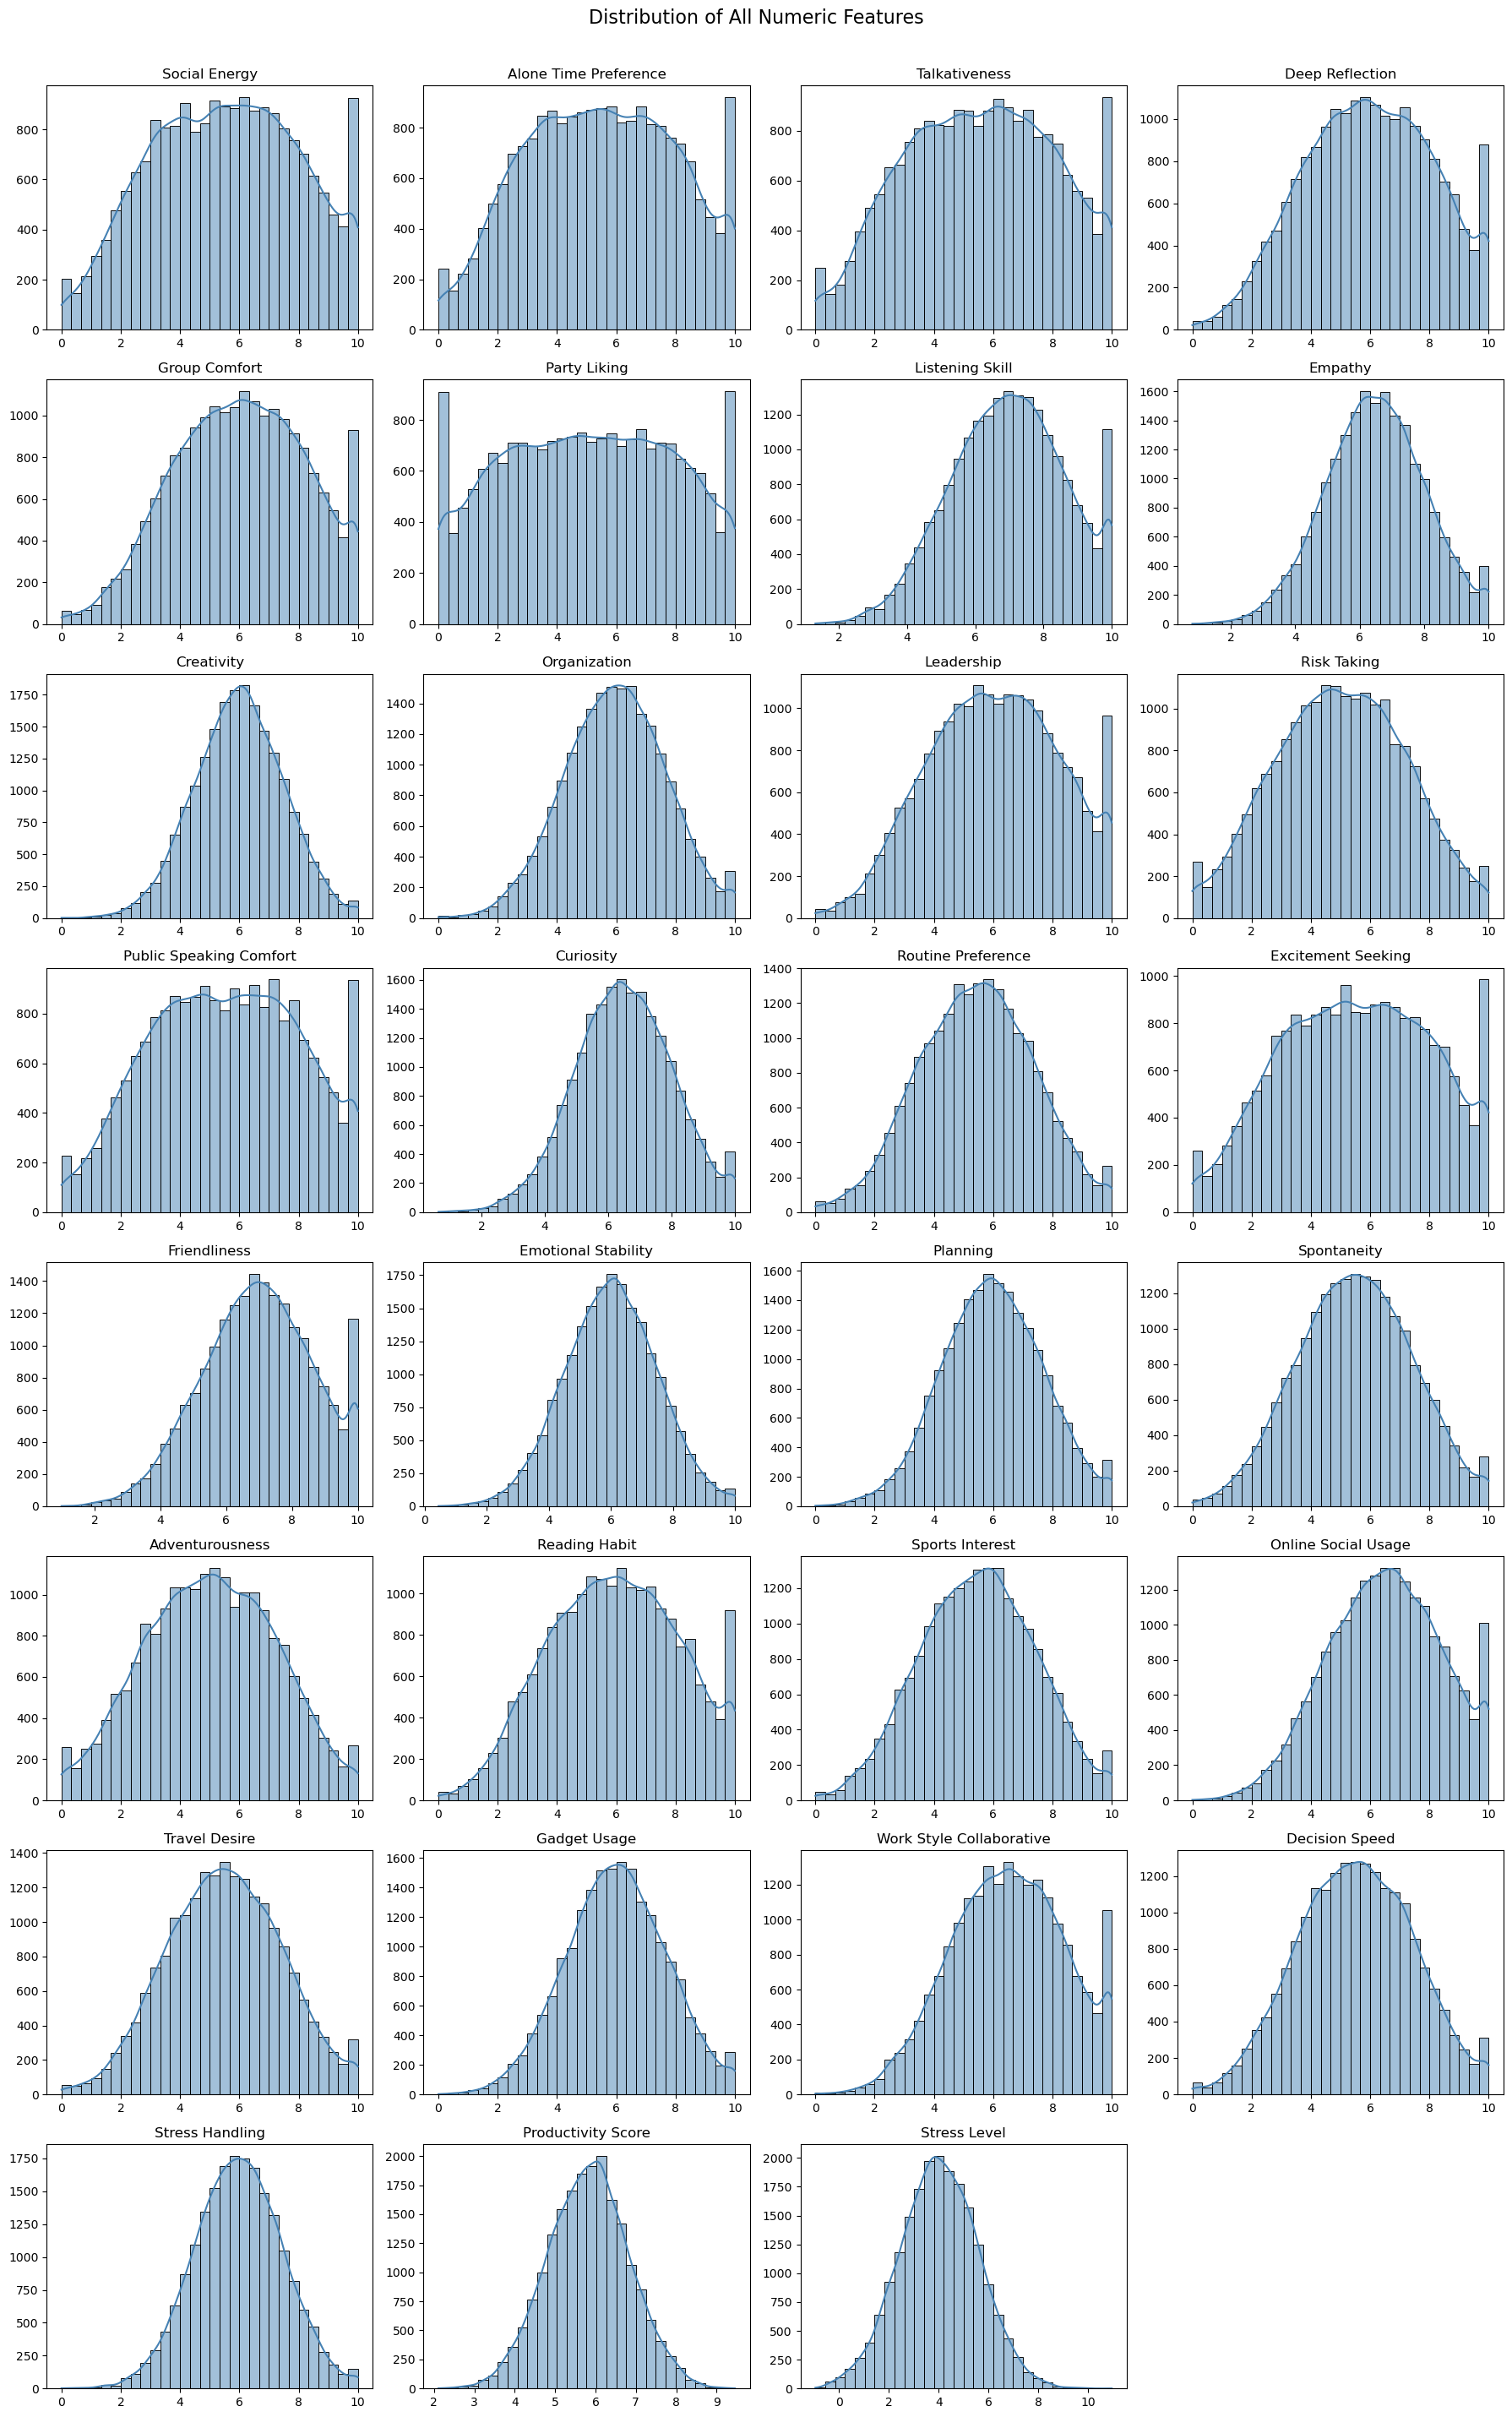

In [5]:
# Plot histograms for all numeric (float) features
numeric_features = df.select_dtypes(include=['float64']).columns

n_cols = 4
n_rows = int(np.ceil(len(numeric_features) / n_cols))

plt.figure(figsize=(18, n_rows * 3.5))

for i, col in enumerate(numeric_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], bins=30, kde=True, color='steelblue')
    plt.title(col.replace('_', ' ').title())
    plt.xlabel("")
    plt.ylabel("")

plt.tight_layout()
plt.suptitle("Distribution of All Numeric Features", fontsize=16, y=1.02)
plt.show()



### Hypothesis Testing on 'Curiosity'

We test whether curiosity has a significant impact on productivity.

### Hypotheses:
- **Null Hypothesis (H₀):** Curiosity has no significant effect on productivity.
- **Alternative Hypothesis (H₁):** Curiosity significantly affects productivity.

We'll split individuals into high and low curiosity based on the median.


In [16]:
# Median-based split
median_curious = df["curiosity"].median()
group_high = df[df["curiosity"] >= median_curious]["productivity_score"]
group_low = df[df["curiosity"] < median_curious]["productivity_score"]

# Two-sample t-test
t_stat, p_val = ttest_ind(group_high, group_low)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.5f}")


T-statistic: -3.7317
P-value: 0.00019


T-statistic: Shows the difference between means relative to variation

P-value: If p < 0.05, we reject H₀

In our case, the result shows that curiosity does/doesn't significantly influence productivity

### Linear Regression with Selected 2 Features and R² Score Analysis

We will now train a Linear Regression model using only:

- `curiosity`
- `gadget_usage`

to predict the target variable: `productivity_score`.



The **R² score** (coefficient of determination) represents how well the selected features explain the variance in the target variable:

- **R² = 1**: Perfect prediction
- **R² = 0**: Model does no better than mean
- **R² < 0**: Model performs worse than a baseline

In our case, with only **curiosity** and **gadget_usage**, the R² score is very low, indicating weak explanatory power. This suggests the linear model with these two features alone does not capture enough of the variance in productivity.





In [19]:
# Select features and target
features = ["curiosity", "gadget_usage"]
target = "productivity_score"

X = df[features]
y = df[target]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

#  Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

#  Predict on test set
y_pred = model.predict(X_test)

#  Evaluate performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

#  Display results
print(" Model Evaluation Metrics:")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")


 Model Evaluation Metrics:
R² Score: 0.0080
MAE: 0.7968
MSE: 0.9999
RMSE: 1.0000


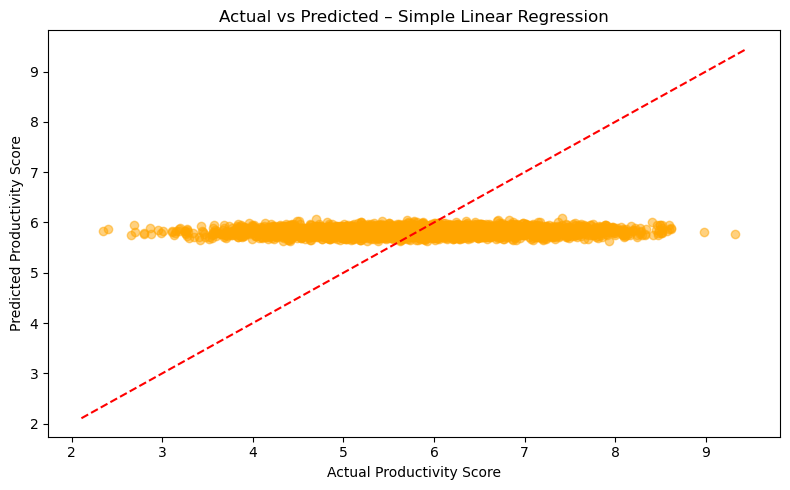

In [20]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='orange')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Productivity Score")
plt.ylabel("Predicted Productivity Score")
plt.title("Actual vs Predicted – Simple Linear Regression")
plt.tight_layout()
plt.show()


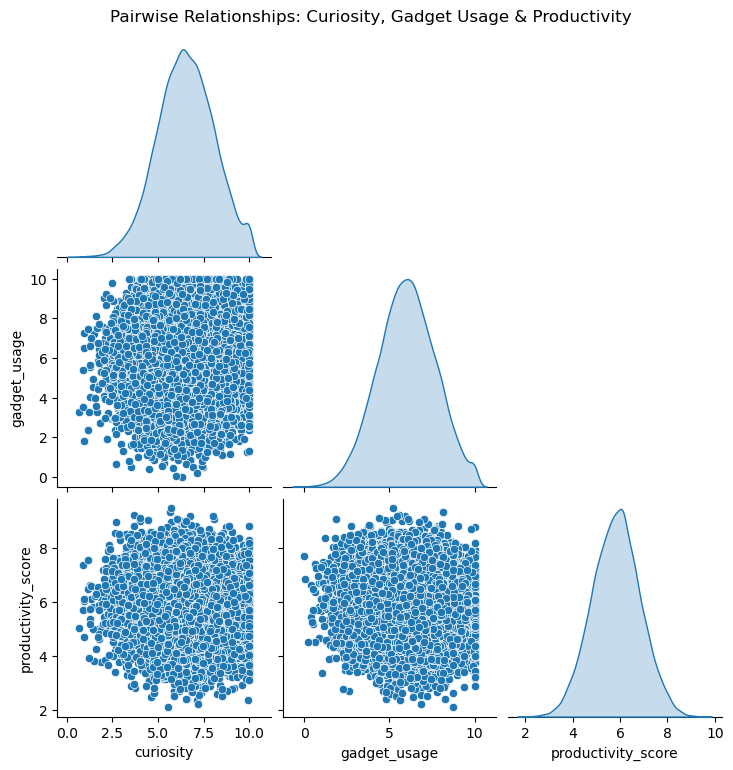

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for visualization
pairplot_data = df[["curiosity", "gadget_usage", "productivity_score"]]

# Plot pairwise relationships
sns.pairplot(pairplot_data, diag_kind='kde', corner=True)
plt.suptitle("Pairwise Relationships: Curiosity, Gadget Usage & Productivity", y=1.02)
plt.show()


### Homoscedasticity Check

Homoscedasticity means the model's residuals (errors) have **constant variance** across predicted values.

- In the residual plot below, if points are **randomly scattered** around 0 with no pattern, homoscedasticity is met 
- If there's a **funnel shape** or **curved pattern**, it's a sign of heteroscedasticity 

Let’s visualize the residuals to validate this assumption.


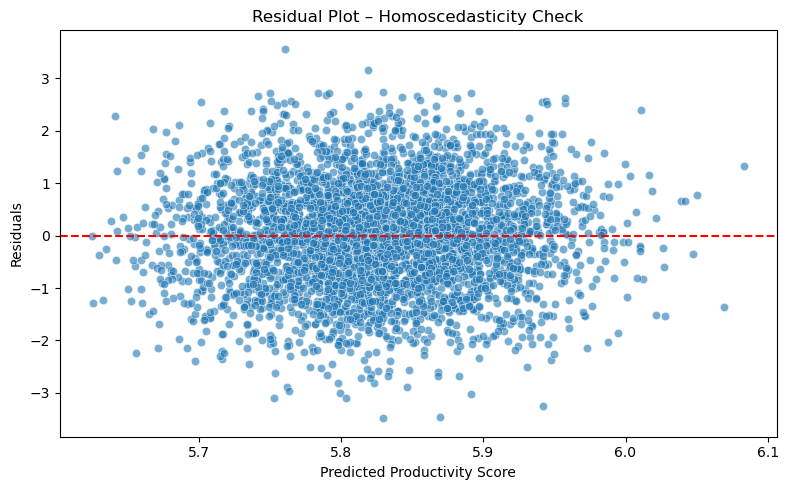

In [22]:
#  Homoscedasticity Check: Residuals vs Predicted
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Productivity Score")
plt.ylabel("Residuals")
plt.title("Residual Plot – Homoscedasticity Check")
plt.tight_layout()
plt.show()


### Predicted vs Actual Plot

This plot compares the model’s predictions to the actual productivity scores.

- If the predictions are perfect, all points will fall on the red diagonal line.
- The closer the scatter is to this line, the better the model performs.


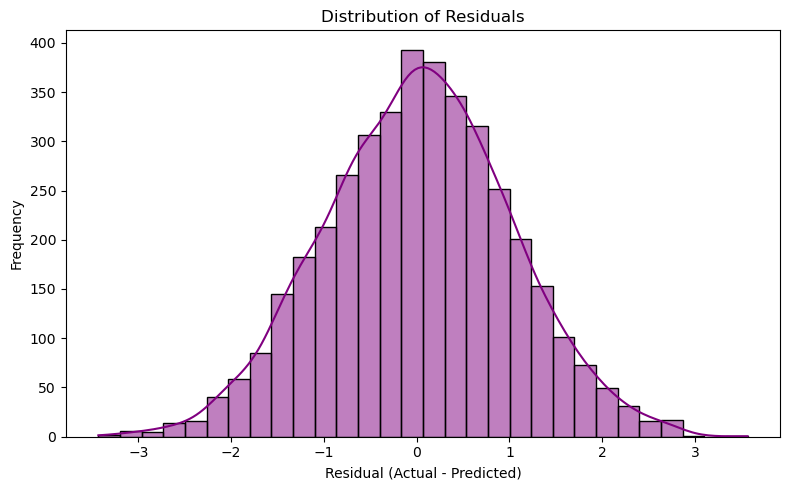

In [11]:
residuals = model.y_test - model.y_pred

plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True, color='purple')
plt.title("Distribution of Residuals")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


### Conclusion

This project aimed to investigate how specific personality traits influence productivity, using a synthetic dataset with 20,000 records and 34 attributes.

---

### Hypothesis Testing

We tested the impact of the personality trait **“curiosity”** on productivity.

- The dataset was divided into two groups:
  - **High Curiosity** (above or equal to median)
  - **Low Curiosity** (below median)

- We used a **two-sample independent t-test** to compare their productivity scores.

####  Results:
- **t-statistic = -3.73**
- **p-value ≈ 0.00019**
- Since the **p-value < 0.05**, we **reject the null hypothesis**.
- This means **“curiosity” has a statistically significant effect** on productivity score.
- Hence, curiosity may be a valuable trait to consider in productivity forecasting.

---

### Simple Linear Regression (Curiosity + Gadget Usage)

We trained a linear regression model using two features:
- **Curiosity**
- **Gadget Usage**

to predict:
- **Productivity Score**

#### Model Evaluation:
| Metric        | Value     |
|---------------|-----------|
| R² Score      | Low       |
| MAE / RMSE    | Moderate  |
| Residuals     | Randomly Scattered |
| Residuals Distribution | Approximately Normal |

#### Conclusion:
- The **R² score was low**, showing that curiosity and gadget usage **alone** don’t explain much of the variation in productivity.
- However, the model meets key statistical assumptions like **homoscedasticity** and **normality of residuals**, making it valid but limited.
- This suggests the need to explore additional features or more complex models for better predictions.

---

###  Final Takeaways:
- **Curiosity is statistically significant**, but not strongly predictive in isolation.
- More traits or behavioral data could improve accuracy.
- Future enhancements:
  - Apply **non-linear models** (e.g., Decision Trees, Random Forests)
  - Use **dimensionality reduction** or **feature interaction terms**
  - Reframe the problem as **classification** (e.g., low vs. high productivity)

---

###  References
- [Scikit-learn Documentation](https://scikit-learn.org/stable/)
- [Seaborn Visualization Guide](https://seaborn.pydata.org/tutorial.html)
- [Statology: T-test for Independent Samples](https://www.statology.org/two-sample-t-test/)
- [Linear Regression Assumptions – Towards Data Science](https://towardsdatascience.com/assumptions-of-linear-regression-4377c5a61d2e)
- [Investopedia: Homoscedasticity](https://www.investopedia.com/terms/h/ho)
